In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = data.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
data.target_names    #it is a list . So we can use index for this.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df['flower_name'] = df['target'].apply(lambda x:data.target_names[x])

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [20]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [21]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Sepal length(cm) vs Sepal width(cm) of Setosa, Versicolor

Text(0, 0.5, 'sepal width (cm)')

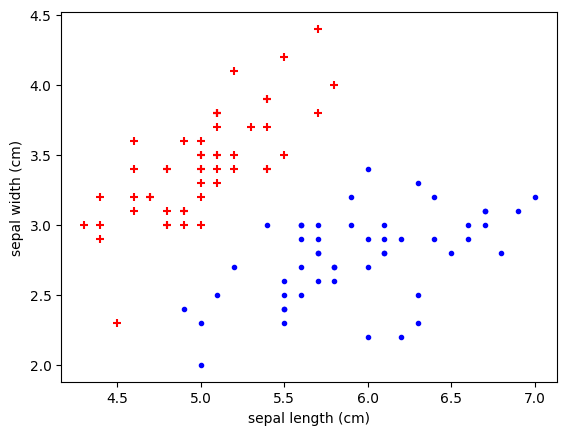

In [23]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], c = 'red', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], c = 'blue', marker = '.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [24]:
X = df.drop(['target','flower_name'], axis = 'columns')
y = df['target']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

Using KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model = KNeighborsClassifier(n_neighbors = 5)    # n_neighbors is 'k' value.(no. of nearest data points)

In [40]:
model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy

In [41]:
model.score(X_test,y_test)

1.0

In [42]:
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train,y_train)

,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
model.score(X_test,y_test)

0.9666666666666667

In [45]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test,y_pred)   # confusion_matrix(truth,predicted)

In [47]:
import seaborn as sn

Text(58.222222222222214, 0.5, 'Truth')

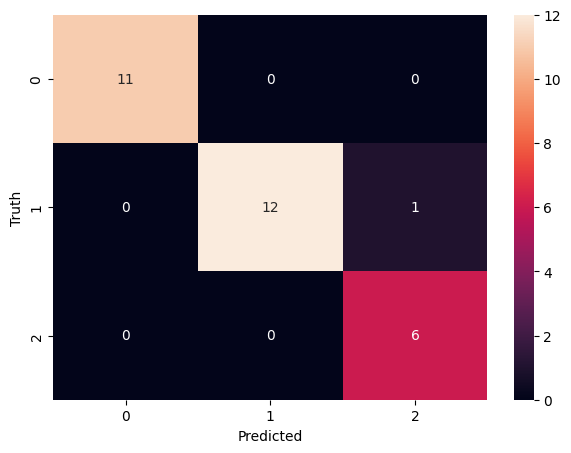

In [49]:
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

